# Tester

In [1]:
import numpy as np
from keras import models

DIRECTORY = '/home/hivini/learn/research/new-covid/'
DATASET_FOLDER = DIRECTORY + 'COVID-19_Radiography_Dataset'
IMG_SIZE = 150

model = models.load_model('/home/hivini/learn/research/new-covid/test/data_aug_adam_val__recall_97_62.h5')

2021-11-07 19:46:46.120099: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-11-07 19:46:47.184313: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-07 19:46:47.194429: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-07 19:46:47.470869: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-11-07 19:46:47.470910: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 with Max-Q Design computeCapability: 7.5
coreClock: 1.215GHz coreCount: 46 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 357.69GiB/s
2021-11-07 19:46:47.470941: I tensorflow/stre

In [2]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/home/hivini/learn/research/new-covid/small_dataset/train',
    target_size=(150, 150),
    shuffle=False,
    batch_size= 1,
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = validation_datagen.flow_from_directory(
    '/home/hivini/learn/research/new-covid/small_dataset/validation',
    target_size=(150, 150),
    shuffle=False,
    batch_size= 1,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    '/home/hivini/learn/research/new-covid/small_dataset/test',
    target_size=(150, 150),
    shuffle=False,
    batch_size= 1,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 10606 images belonging to 3 classes.
Found 2273 images belonging to 3 classes.
Found 2274 images belonging to 3 classes.


In [3]:
print(len(train_generator.filenames))
print(len(train_generator.classes))

10606
10606


In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def confusionMatrix(datagen):
    Y_pred = model.predict(datagen)
    y_pred = np.argmax(Y_pred, axis=1)
    matrix = confusion_matrix(datagen.classes, y_pred)
    percent_matrix = []
    for m in matrix:
        percent_matrix.append(((m / np.sum(m))*100).tolist())
    print('Confusion Matrix')
    print(matrix)
    print('Percent Confusion Matrix')
    for p in percent_matrix:
        print(p)
    print('Classification Report')
    print(classification_report(datagen.classes, y_pred))
    for filename, prediction, label in zip(datagen.filenames, y_pred, datagen.classes):
        if prediction != label:
            print(filename, ' has been classified as ', prediction, 'and should be ', label) 

In [5]:
test_loss, test_acc, test_recall = model.evaluate(test_generator)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_acc)

2021-11-07 19:46:50.144424: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-07 19:46:50.144875: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2208005000 Hz
2021-11-07 19:46:50.391142: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-11-07 19:46:50.603733: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-11-07 19:46:52.070400: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2021-11-07 19:46:52.171776: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


2274/2274 [==============================] - 25s 8ms/step - loss: 0.0768 - accuracy: 0.9745 - recall: 0.9745
Loss on test set:  0.07680130004882812
Accuracy on test set:  0.9744942784309387


In [6]:
test_loss, test_acc, test_recall = model.evaluate(train_generator)
print("Loss on train set: ", test_loss)
print("Accuracy on train set: ", test_acc)

10606/10606 [==============================] - 85s 8ms/step - loss: 0.0231 - accuracy: 0.9916 - recall: 0.9915
Loss on train set:  0.023066965863108635
Accuracy on train set:  0.9916085004806519


In [7]:
test_loss, test_acc, test_recall = model.evaluate(validation_generator)
print("Loss on validation set: ", test_loss)
print("Accuracy on validation set: ", test_acc)

2273/2273 [==============================] - 19s 8ms/step - loss: 0.0623 - accuracy: 0.9820 - recall: 0.9820
Loss on validation set:  0.06228876858949661
Accuracy on validation set:  0.9819621443748474


In [8]:
# Mostrar la matriz en porcentajes tambien.
# Hacer un analisis de las que se equivoco en comparacion con las que 
# agarro correcto con el heatmap y ver visualmente como el modelo se equivoco
# Cambiar el heatmap como una serie de cuadros mejor.
confusionMatrix(test_generator)

Confusion Matrix
[[ 517   26    0]
 [  12 1509    8]
 [   3    9  190]]
Percent Confusion Matrix
[95.21178637200737, 4.788213627992634, 0.0]
[0.7848266841072596, 98.6919555264879, 0.5232177894048398]
[1.4851485148514851, 4.455445544554455, 94.05940594059405]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       543
           1       0.98      0.99      0.98      1529
           2       0.96      0.94      0.95       202

    accuracy                           0.97      2274
   macro avg       0.97      0.96      0.96      2274
weighted avg       0.97      0.97      0.97      2274

covid/COVID-1003.png  has been classified as  1 and should be  0
covid/COVID-1180.png  has been classified as  1 and should be  0
covid/COVID-1193.png  has been classified as  1 and should be  0
covid/COVID-1226.png  has been classified as  1 and should be  0
covid/COVID-1585.png  has been classified as  1 and should be  0
covid/COVID-1

In [9]:
confusionMatrix(train_generator)

Confusion Matrix
[[2504   26    1]
 [  35 7088   11]
 [   0   16  925]]
Percent Confusion Matrix
[98.93322797313316, 1.0272619517977084, 0.03951007506914263]
[0.49060835435940564, 99.35520044855622, 0.1541911970843846]
[0.0, 1.7003188097768331, 98.29968119022317]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2531
           1       0.99      0.99      0.99      7134
           2       0.99      0.98      0.99       941

    accuracy                           0.99     10606
   macro avg       0.99      0.99      0.99     10606
weighted avg       0.99      0.99      0.99     10606

covid/COVID-1101.png  has been classified as  1 and should be  0
covid/COVID-1187.png  has been classified as  1 and should be  0
covid/COVID-1687.png  has been classified as  1 and should be  0
covid/COVID-1822.png  has been classified as  1 and should be  0
covid/COVID-1971.png  has been classified as  2 and should be  0
covid/CO

In [10]:
confusionMatrix(validation_generator)

Confusion Matrix
[[ 525   16    1]
 [  10 1515    4]
 [   0   10  192]]
Percent Confusion Matrix
[96.86346863468634, 2.952029520295203, 0.18450184501845018]
[0.6540222367560496, 99.08436886854153, 0.2616088947024199]
[0.0, 4.9504950495049505, 95.04950495049505]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       542
           1       0.98      0.99      0.99      1529
           2       0.97      0.95      0.96       202

    accuracy                           0.98      2273
   macro avg       0.98      0.97      0.97      2273
weighted avg       0.98      0.98      0.98      2273

covid/COVID-1164.png  has been classified as  1 and should be  0
covid/COVID-1206.png  has been classified as  1 and should be  0
covid/COVID-1257.png  has been classified as  1 and should be  0
covid/COVID-1394.png  has been classified as  1 and should be  0
covid/COVID-1592.png  has been classified as  1 and should be  0
covid/COVI

## Heatmap

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [12]:
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                print('USING LAYER: ', layer.name)
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            
            loss = predictions[:, tf.argmax(predictions[0])]
    
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [13]:
from keras.preprocessing.image import load_img, img_to_array

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = load_img(img_path, target_size=size, color_mode='grayscale')
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = img_to_array(img)
    norm = np.linalg.norm(array)
    normal_array = array/norm
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    normal_array = np.expand_dims(normal_array, axis=0)
    return normal_array

In [14]:
search = 'viral_pneumonia/Viral Pneumonia-36.png'
searched_index = -1
for f in range(len(test_generator.filenames)):
    if test_generator.filenames[f] == search:
        searched_index = f
        break
if searched_index == -1:
    print('NOT FOUND')
print(test_generator.filenames[searched_index])
test_generator.batch_index = searched_index
data = test_generator.next()
plt.imshow(data[0][0], cmap='gray')


viral_pneumonia/Viral Pneumonia-36.png


NameError: name 'plt' is not defined

[[0.02441173 0.28176603 0.69382226]]
2


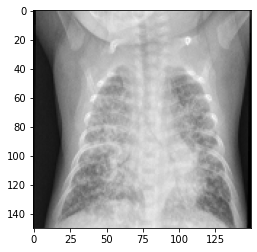

In [ ]:
IMAGE_FILE = f'/home/hivini/learn/research/new-covid/small_dataset/test/{search}'
IMAGE_TO_ARRAY = get_img_array(IMAGE_FILE, (150, 150))
IMAGE = np.expand_dims(data[0][0], axis=0)
plt.imshow(IMAGE_TO_ARRAY[0], cmap='gray')
preds = model.predict(data[0])
c = np.argmax(preds[0])
print(preds)
print(c)
# print(IMAGE[0])

In [ ]:
import matplotlib.pyplot as plt


def getHeatmap(layerName: str):
    icam = GradCAM(model, c, layerName) 
    heatmap = icam.compute_heatmap(IMAGE)
    heatmap = cv2.resize(heatmap, (150, 150))
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_GRAY2RGB)

    image_r = cv2.imread(IMAGE_FILE, cv2.IMREAD_GRAYSCALE)
    image_r = cv2.resize(image_r, (150, 150))
    image_r = np.expand_dims(image_r, axis=-1)
    image_r = cv2.cvtColor(image_r, cv2.COLOR_GRAY2RGB)
    (heatmap, overlay) = icam.overlay_heatmap(heatmap, image_r, alpha=0.5)

    return heatmap, overlay

In [ ]:
layers = []
for layer in model.layers:
    # check to see if the layer has a 4D output
    if len(layer.output_shape) == 4:
        heapmap, overlay = getHeatmap(layer.name)
        layers.append([layer.name, heapmap, overlay])

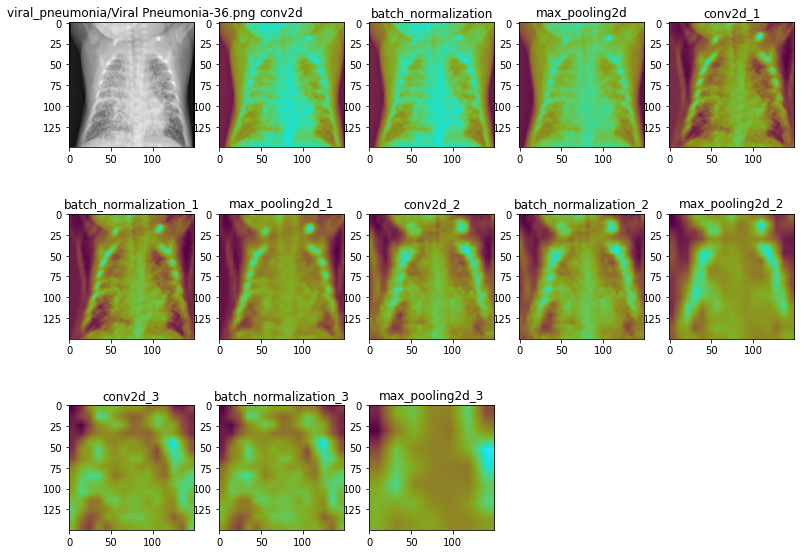

In [ ]:
fig = plt.figure(figsize=(13, 17))
columns = 5
rows = 5

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []
ax.append(fig.add_subplot(rows, columns, 1))
ax[-1].set_title(search)
plt.imshow(data[0][0], cmap='gray')
i = 1
for layer in layers:
    img = layer[1]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(layer[0])  # set title
    plt.imshow(img)
    i += 1